Player Clustering  
========
Is it possible to separate AUDL players into groups based on their role and playstyle?

Only 6 of the 24 AUDL teams have rosters with player positions specified, and some teams have different position names than others. These teams may be useful later, but it looks like we do not have suffieicnt information to do traditional classification. Instead we will have to take a clustering/unsupervised learning approach to identify different groups of players. 

__The teams with player positions on their rosters:__  
http://www.myalleycats.com/#!team/c10ek  
http://the-dcbreeze.com/2016-roster-2/  
https://www.laaviators.com/2015-roster/  
http://ottawaoutlaws.com/team/roster/  
http://torontorush.com/club/toronto-rush/  
http://www.sdgrowlers.com/roster/

From the outset, we suspect that AUDL teams follow traditional ultimate schemes where players are split into offense/defense and handlers/cutters. This is the perfect appication for unsupervised clustering, as we expect that these groups exist but we do not have data for all players for it. 

### Playing with sklearn.cluster.KMeans

In [48]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pdb

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets

from scipy.spatial.distance import cdist

pd.set_option('display.max_columns', None)

In [3]:
iris = datasets.load_iris()
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
KMeans(n_clusters=3).fit(iris.data).labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Processing data

In [7]:
%%bash 
ls South

AtlantaHustle2015-stats.csv
CharlotteExpress2015-stats.csv
JacksonvilleCannons2015-stats.csv
NashvilleNightwatch2015-stats.csv
RaleighFlyers2015-stats.csv


In [8]:
# we'll test all of this with just Raleigh Flyers data
raleigh = pd.read_csv("South/RaleighFlyers2015-stats.csv")

For our k-means algorithm we want an n_item x n_feature matrix where each of the items is a player and each of the features is a statistical parameter that we think will help us cluster. This means that we need to decide what parameters we are interested in. I propose:  
- Percentage of points played that were O points
- Percentage of points where player scores a goal
- Percentage of points where player earns an assist

In [9]:
def clean_df(df):
    """Removes rows with improperly formatted data
    
    df: pandas dataframe with throw-by-throw data
    
    returns: pandas df"""
    
    return df[pd.isnull(df["Player 1"]) == False]


In [10]:
def get_players(df):
    """returns list of all players present in throw-by throw pandas dataframe"""
    players = pd.unique(df.loc[0:, "Player 0": "Player 27"].values.ravel())
    return [player for player in players if not pd.isnull(player)]

In [11]:
get_players(raleigh)

['Snoke D',
 'Bowen J',
 'Tarasi D',
 'Mitche T',
 'Nether J',
 'Dieter B',
 'Casey B',
 'Clark B',
 'Matthe R',
 'Hastin J',
 'Zhou M',
 'Colema J',
 'Snell B',
 'Moore M',
 'Chandl D',
 'McGoog J',
 'Maxsta X',
 'Richar D',
 'Green T',
 'Cretel J',
 'Bender S',
 'Pope T',
 'Allen J',
 'Goode R',
 'Hartzo J',
 'Neve M',
 'Willia J',
 'Saul N',
 'Lin M',
 'McAlis T',
 'Taylor H',
 'Ryan A',
 'Stumpf M',
 'Cooper S',
 'Poulos S',
 'Colicc C',
 'Weeks P',
 '1461',
 '8456',
 'Jessi J']

In [12]:
def summarize_points(df):
    """Gives point-by-point summaries
    
    df: pandas dataframe throw-by-throw data
    
    returns: pandas dataframe"""
    
    return df.groupby(["Date/Time", "Our Score - End of Point", "Their Score - End of Point"]).last().reset_index() 


In [13]:
summarize_points(raleigh).head(3)

,Date/Time,Our Score - End of Point,Their Score - End of Point,Tournamemnt,Opponent,Point Elapsed Seconds,Line,Event Type,Action,Passer,Receiver,Defender,Hang Time (secs),Player 0,Player 1,Player 2,Player 3,Player 4,Player 5,Player 6,Player 7,Player 8,Player 9,Player 10,Player 11,Player 12,Player 13,Player 14,Player 15,Player 16,Player 17,Player 18,Player 19,Player 20,Player 21,Player 22,Player 23,Player 24,Player 25,Player 26,Player 27,Elapsed Time (secs)
0,2015-04-11 18:59,0,1,AUDL,Atlanta Hustle,16,D,Defense,Goal,NaN,NaN,Anonymous,4,Clark B,Matthe R,Green T,Cretel J,Zhou M,Bender S,Pope T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,2015-04-11 18:59,0,2,AUDL,Atlanta Hustle,41,O,Defense,Goal,Allen J,Anonymous,Anonymous,NaN,Bowen J,Snoke D,Mitche T,Tarasi D,Dieter B,Casey B,Allen J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
2,2015-04-11 18:59,1,2,AUDL,Atlanta Hustle,65,O,Offense,Goal,Snoke D,Neve M,Anonymous,NaN,Snoke D,Goode R,Tarasi D,Chandl D,Neve M,Cretel J,Allen J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225


In [14]:
def player_summaries(df):
    """Summarize statistics for all players
    
    df: pandas dataframe with throw-by-throw data
    
    returns: pandas dataframe"""
    
    players = get_players(df)
    stats = {"goals"     : 0,
             "assists"   : 0,
             "ds"        : 0,
             "throwaways": 0,
             "drops"     : 0,
             "opoints"   : 0,
             "dpoints"   : 0}
    team_stats = {player: dict(stats) for player in players}
    
    # does not mutate the original
    df = clean_df(df)
    
    # add goals and assists
    ogoals = df[(df.Action == "Goal") & (df["Event Type"] == "Offense")]
    for row in ogoals.values:
        # we have try/execpt here for unpredictable data impurities
        # eg: "Anonymous" for one of the assists, stat-keeper must
        # have not known who threw it (?)
        try: team_stats[row[9]]["assists"] += 1
        except: pass
        try: team_stats[row[10]]["goals"]  += 1
        except: pass
        
    # add D's
    ds = df.Defender[df.Action == "D"]
    for player in ds:
        try: team_stats[player]["ds"] += 1
        except: pass
        
        
    # add turnovers and drops
    turns = df[((df.Action == "Throwaway") & (df["Event Type"] == "Offense")) | (df.Action == "Drop") ]
    for row in turns.values:
        if row[8] == "Throwaway":
            try: team_stats[row[9]]["throwaways"] += 1
            except: pass
        else:
            try: team_stats[row[10]]["drops"]     += 1
            except: pass
            
    # add points
    for row in summarize_points(raleigh).values:
        player_cols = row[13:41]
        players = [player for player in player_cols if not pd.isnull(player)]
        if row[6] == "O":
            for player in players:
                team_stats[player]["opoints"] += 1
        else:
            for player in players:
                team_stats[player]["dpoints"] += 1
                
    summary = pd.DataFrame.from_dict(team_stats, orient="index").sort_values("goals", ascending=False)
    summary = summary[["goals", "assists", "ds", "throwaways", "drops", "opoints", "dpoints"]]
    summary["totalpoints"] = summary["opoints"] + summary["dpoints"]
    summary["pct_opoints"] = summary["opoints"] / [float(x) for x in summary["totalpoints"]]
    summary["pct_goal"]    = summary["goals"]   / [float(x) for x in summary["totalpoints"]]
    summary["pct_assist"]  = summary["assists"] / [float(x) for x in summary["totalpoints"]]
    summary["pct_d"]       = summary["ds"]      / [float(x) for x in summary["totalpoints"]]
    
    return summary

In [15]:
summary_ral = player_summaries(raleigh)
summary_ral.head()

,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_goal,pct_assist,pct_d
Allen J,62,60,14,35,5,299,119,418,0.715311,0.148325,0.143541,0.033493
Bowen J,62,49,7,27,10,287,50,337,0.851632,0.183976,0.145401,0.020772
Mitche T,26,21,12,25,9,283,83,366,0.773224,0.071038,0.057377,0.032787
Snoke D,25,29,11,12,2,254,39,293,0.866894,0.085324,0.098976,0.037543
Neve M,25,12,12,6,3,159,86,245,0.648980,0.102041,0.048980,0.048980


We now have the matrix with the preliminary statistics we want to cluster on. Let's try kmeans and see what we can see.

In [16]:
cluster_cols = summary_ral[["totalpoints", "pct_opoints", "pct_goal", "pct_assist"]]
model = KMeans(n_clusters=5).fit(cluster_cols.values)
summary_ral["cluster"] = model.labels_
summary_ral.groupby("cluster").count()

,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_goal,pct_assist,pct_d
cluster,,,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9,9,9
1,16,16,16,16,16,16,16,16,16,16,16,16
2,6,6,6,6,6,6,6,6,6,6,6,6
3,3,3,3,3,3,3,3,3,3,3,3,3
4,6,6,6,6,6,6,6,6,6,6,6,6


In [17]:
summary_ral.groupby("cluster").mean()

,goals,assists,ds,throwaways,drops,opoints,dpoints,totalpoints,pct_opoints,pct_goal,pct_assist,pct_d
cluster,,,,,,,,,,,,
0,9.000000,10.222222,8.888889,8.333333,2.111111,47.000000,167.222222,214.222222,0.231227,0.041778,0.049304,0.040945
1,2.375000,1.375000,2.437500,1.375000,0.562500,6.500000,32.000000,38.500000,0.287504,0.051854,0.029672,0.050820
2,17.166667,24.000000,9.333333,13.333333,2.833333,161.166667,112.166667,273.333333,0.588363,0.063496,0.087144,0.034113
3,50.000000,43.333333,11.000000,29.000000,8.000000,289.666667,84.000000,373.666667,0.780056,0.134447,0.115439,0.029017
4,8.500000,5.833333,3.333333,5.166667,1.666667,58.166667,69.666667,127.833333,0.457130,0.066777,0.045453,0.026462


Let's try to use the elbow method to see what the optimal number of clusters is

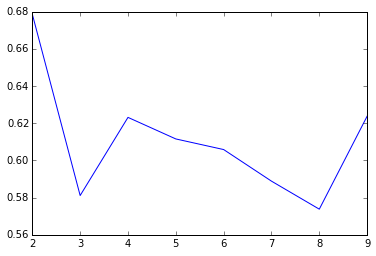

In [49]:
num_clusters = range(2, 10)
models = [KMeans(n_clusters = x) for x in num_clusters]
def score_from_model(model):
    predicted = model.fit_predict(cluster_cols.values)
    return silhouette_score(cluster_cols.values, predicted)
scores = [score_from_model(model) for model in models]
scores

plt.plot(num_clusters, scores)


In [34]:
silhouette_score(cluster_cols.values, model.predict(cluster_cols.values))

0.62679957628675442